In [ ]:
%pip install matplotlib pandas numpy scikit-learn  mlflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow

In [140]:
pd.set_option('display.max_columns', None) # display all columns

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [141]:
df.isna().sum().sum()

0

In [153]:
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

In [132]:
mlflow.set_experiment('diabetes_classification')

<Experiment: artifact_location='file:///c:/Users/Pc/Desktop/HTU/2024-2025/Artificial%20Intelligence/diabetes_classification/mlruns/157510782472443811', creation_time=1735926115394, experiment_id='157510782472443811', last_update_time=1735926115394, lifecycle_stage='active', name='diabetes_classification', tags={'mlflow.note.content': '',
 'mlflow.sharedViewState.8dabb0e5db413dab46fd72dde92341eaa82cba7583f2b2bc6fcef09d4c33614f': 'deflate;eJztV1tv2zoM/iuDnoPBTtI4yVua023F0p2DpCsGFEMmy7StTZZcXbK4Rf77qDgXnzZZXw6QAGePoijy40eaNJ+IAapZ/o4LC5oMCWkRpRPQl9VHqPBcgNWcmbffKGNOU1Z922uMDCPDlAoDLWIs1faWF4BvRpMJKgmeAquYgJ3tEbN8AXiVUEsNWLO9uf/aIoVKQNyBNlzJ/Qsh3kydNPjGgABmIRkr4QqUDO8JtYgtdhYQ3kw5zcCDa0pvvFHzXPpX7d6LD4bX0F2HNbc+rhaxNEPNQqRC/XzrDGivXFJNCxQbJRZegqFoRHy1LKlMICHDp1Ut+YdL6c/3G40PPElA7s933PCYC26rG1riMxLG7U6c9NpxN0q7USeO6WDQ6Qx6AfS7F9BH7q12sGpa8/Eibe+up7PbeRjMp58/zRAjUwXCBGRynGM8nrwn4hxHNCSMOr0gumhHUdC5yBZZkcuHgQ+2Kr2py9GU1B7Gykl7q8a1LTIMgy19M0wMZu26YS7ohr1BBKoP0n2PfcoxfdaHv6kXbt6DBE3XMh/H1lhddtt

### Using LogisticRegression model with Cross-Validation and feature selection

In [181]:
mlflow.start_run(run_name='LogisticRegression_final')
mlflow.set_tag("Feature Selection", True)
mlflow.set_tag("Scaled Data", True)

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)

# X_test_scaled = scaler.transform(X_test)

In [170]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)

selected_features = X.columns[sfm.get_support()]
SFM_df = df[selected_features]
SFM_df

,HighBP,HighChol,CholCheck,HvyAlcoholConsump
0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,1.0,1.0,0.0
...,...,...,...,...
253675,1.0,1.0,1.0,0.0
253676,1.0,1.0,1.0,0.0
253677,0.0,0.0,1.0,0.0
253678,1.0,0.0,1.0,0.0


splitting and scaling the selected features

In [171]:
X = SFM_df
y = df['Diabetes_binary']

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1, fit_intercept=False, random_state=42, n_jobs=-1)

# parameter grid
param_grid = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [100000,10000000],
    "solver": ["saga"],
    "l1_ratio": [0.5],
}

# Set up Stratified K-Folds for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the GridSearchCV object
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=cv,
    verbose=2, # Show progress of GridSearch
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(fit_intercept=False, max_iter=1,
                                          n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': [100000, 10000000], 'l1_ratio': [0.5],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             verbose=2)

In [182]:
# Log parameters, metrics, and the best model
mlflow.log_param("param_grid", param_grid)
mlflow.log_metric("accuracy", grid_search.best_score_)

for param, value in grid_search.best_params_.items():
    mlflow.log_param(param, value)

# Log the best model
best_model = grid_search.best_estimator_
mlflow.sklearn.log_model(best_model, "LogisticRegression_final")

2025/01/09 21:11:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Presicion: 0.3005149009205804
Recall: 0.55052165213663
Accuracy: 0.7612937559129612
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.85     43739
         1.0       0.30      0.55      0.39      6997

    accuracy                           0.76     50736
   macro avg       0.61      0.67      0.62     50736
weighted avg       0.83      0.76      0.79     50736

--------------------------------------------------


<Figure size 640x480 with 0 Axes>

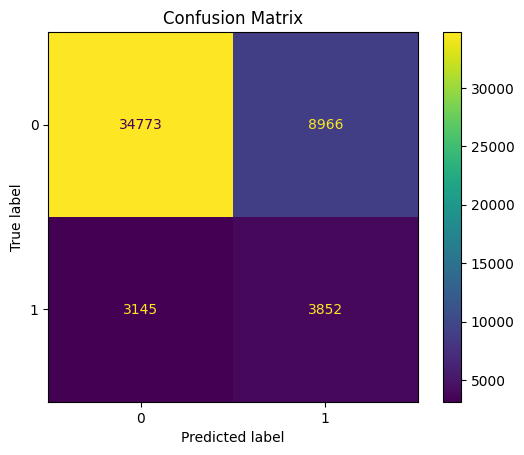

In [183]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
presicion, recall, f1 = precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

# log metrics
mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("presicion", presicion)
mlflow.log_metric("recall", recall)
mlflow.log_metric("f1_score", f1)

# get confusion matrix values
conf_matrix = confusion_matrix(y_test,y_pred)
true_positive = conf_matrix[0][0]
true_negative = conf_matrix[1][1]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

# log confusion matrix values
mlflow.log_metric("true_positive", true_positive)
mlflow.log_metric("true_negative", true_negative)
mlflow.log_metric("false_positive", false_positive)
mlflow.log_metric("false_negative", false_negative)

# Save confusion matrix plot to a file
plt.figure()
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
# plt.close()

# Log the saved plot as an artifact
mlflow.log_artifact("confusion_matrix.png","confusion_matrix")

print(f"Presicion: {presicion}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print('-'*50)
print(f"Classification Report:\n{class_report}")
print('-'*50)
plt.show()
mlflow.end_run()

Rule Based and LogisticRegression

In [184]:
import mlflow
uri = "mlruns/157510782472443811/9a8e3ebd197844e4b90eea99377cac6a/artifacts/LogisticRegression_final"
model = mlflow.sklearn.load_model(uri)
model_prediction = model.predict(X_test)

In [369]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

_, X_test, _, y_test = train_test_split(X, y, test_size=0.0001, random_state=311111)

selected_features = ['HighBP', 'HighChol', 'CholCheck', 'HvyAlcoholConsump']

def predict_diabetes(row):
    score = 0

    if row["HighBP"] == 1.0:
        score += 1
    if row["HighChol"] == 1.0:
        score += 1
    if row["BMI"] > 40.0:
        score += 1
    if row["PhysActivity"] == 0.0:
        score += 1
    if row["Smoker"] == 1.0:
        score += 1
    if row["Age"] >= 8:
        score += 1
    if row["DiffWalk"] == 1.0:
        score += 1
    if row["GenHlth"] >= 4.0:  # Poor general health
        score += 1

    # Predict diabetes if score exceeds a threshold otherwise use the built ML model
    return 1 if score >= 5 else best_model.predict(row[selected_features].values.reshape(1, -1))[0]

# Apply the rule-based prediction
rule_based_predict = X_test.apply(predict_diabetes, axis=1)

# Create a DataFrame to display results
# results_df = pd.DataFrame({
#     'Rule-based Prediction': rule_based_predict,
#     'Actual': y_test
# })

from sklearn.metrics import accuracy_score

r2_rule_based = accuracy_score(y_test, rule_based_predict)

print(f"Rule-based Prediction Accuracy: {r2_rule_based}")
print('\n')

Rule-based Prediction Accuracy: 0.8461538461538461




d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\Downloaded Programs\anaconda3\envs\tf2.10\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid 

In [300]:
mlflow.end_run()

In [302]:
!mlflow ui --port 5000

^C
